In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate a sample with 1000 datapoints
sample1 = np.random.normal(loc=20, scale=5, size=300)
sample2 = np.random.normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

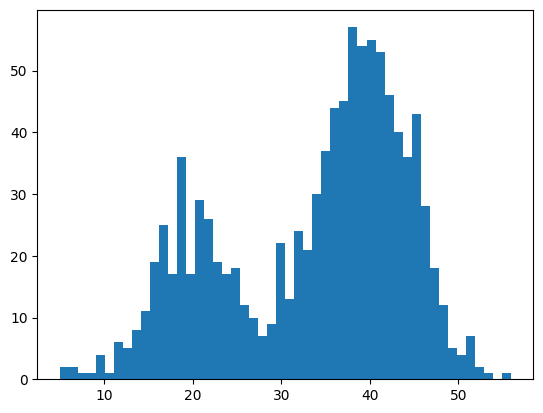

In [5]:
# plot histogram bins=50
plt.hist(sample,bins=50)
plt.show()

In [6]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=3,kernel='gaussian')

# convert data 2d array
sample = sample.reshape((len(sample),1))

model.fit(sample)

KernelDensity(bandwidth=3)

In [8]:
# Generate 100 datapoints between min value of sample and max value of sample
values = np.linspace(sample.min(),sample.max(),100)
# value conver into 2D
values = values.reshape((len(values),1))

In [9]:
# calculate probability density
probability_density = model.score_samples(values)
probability_density = np.exp(probability_density)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

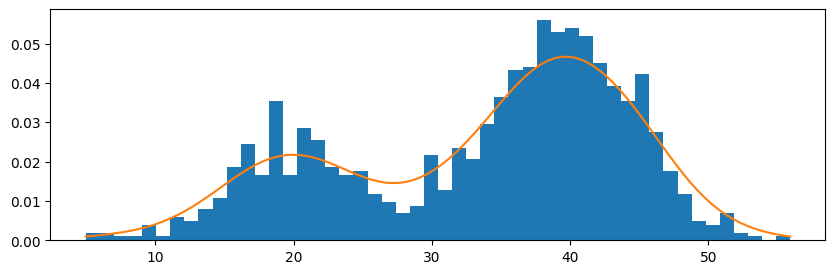

In [11]:
# plot graph for pdf
plt.figure(figsize=(10,3))
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probability_density)
plt.show()

In [18]:
# cdf of pdf
import pandas as pd
df = pd.DataFrame(np.cumsum(probability_density)/2)

<Axes: title={'center': 'cdf of pdf'}>

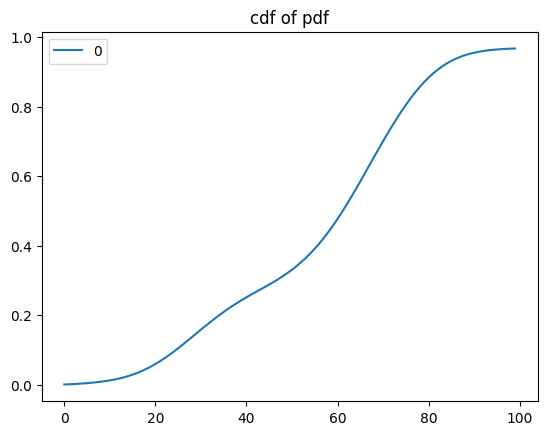

In [20]:
df.plot(title='cdf of pdf')